In [1]:
import emoji 
import csv
import datetime
import re
from collections import Counter
import timeit
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Desktop
#filepath = 'C:\\Users\\Wilm Hanke\\Documents\\GitHub\\twitter_stream\\tweet files\\concat_all_tweets.txt'

# Mobile
filepath = 'C:\\Users\\Wilm\\Documents\\GitHub\\twitter_stream\\tweet files\\concat_all_tweets.txt'

In [ ]:
# merge all several tweet Files to one big file: 'concat_all_tweets.txt'

# uncomment for safety reasons

#allfiles = glob.iglob('C:\\Users\\Wilm Hanke\\Documents\\GitHub\\twitter_stream\\tweet files\\*.txt')


"""
for file in allfiles:
    with open(file, 'r+', encoding = 'utf-8') as f:
        with open('C:\\Users\\Wilm Hanke\\Documents\\GitHub\\twitter_stream\\tweet files\\concat_all_tweets.txt', 'a', encoding = 'utf-8') as f2:
            for line in f:
                if not line == '\n':
                    f2.write(line)
"""

In [2]:
# creating DataFrame

df = pd.DataFrame(pd.read_csv(filepath, header = None, index_col = False))

In [ ]:
df.info()

In [3]:
df.columns=['created_at','id_str','in_reply_to_user_id_str','raw_text']

# entfernt Spalte "created_at"
df = df.drop(columns='created_at')

In [4]:
# drop tweets which startswith 'RT' --> get only original tweets, without Retweets

df_filtered_by_RT = df[~df.raw_text.str.startswith('RT')]

df_filtered_by_RT.head(1)

,id_str,in_reply_to_user_id_str,raw_text
15,997055699308888064,NaN,TbhBESOK FAKE LOVE#iVoteBTSBBMAs @BTS_twt


In [9]:
def extract_chars(my_str):     
    return ''.join([c for c in my_str if not(c in emoji.UNICODE_EMOJI)])

def anonymize_username(my_str):
    anonymized_text = ['@username' if x.startswith('@') else x for x in list(my_str.split())]
    return ' '.join(anonymized_text)

def anonymize_hashtag(my_str): 
    return ' '.join(['#hashtag' if x.startswith('#') else x for x in list(my_str.split())])

def delete_links(my_str): 
    return ' '.join(['' if x.startswith('https') else x for x in list(my_str.split())])
# to do: hashtags und links entfernen

df_clean_text = df['raw_text'].apply(lambda x: delete_links(anonymize_hashtag(anonymize_username(extract_chars(x)))))

In [10]:
def extract_emojis(my_str):
    return ''.join(c for c in my_str if c in emoji.UNICODE_EMOJI)

df_extr_emojis = df['raw_text'].apply(lambda x: extract_emojis(x))

In [11]:
# unhide the strings in jupyter notebook
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

new_df = df_filtered_by_RT.assign(clean_text = df_clean_text, extr_emojis = df_extr_emojis)
new_df.head()

,id_str,in_reply_to_user_id_str,raw_text,clean_text,extr_emojis
15,997055699308888064,NaN,TbhBESOK FAKE LOVE#iVoteBTSBBMAs @BTS_twt,TbhBESOK FAKE LOVE#iVoteBTSBBMAs @username,
24,997055702848782336,NaN,#PremiosMTVMiaw #MTVBRKPOPBTS #MTVLAKPOPBTS #MTVLAFANARMYBTS @BTS_twt https://t.co/1nAL8KKoGB,#hashtag #hashtag #hashtag #hashtag @username,
50,997055707471003653,811958256.0,@lukewaltham @BTS_twt Thk u so much for join with INDONESIA ARMYI Purple You 💜BESOK FAKE LOVE#IVoteBTSBBMAs@BTS_twt,@username @username Thk u so much for join with INDONESIA ARMYI Purple You BESOK FAKE LOVE#IVoteBTSBBMAs@BTS_twt,💜
54,997055711459889153,NaN,I vote for @BTS_twt for the #IVoteBTSBBMAs Top social artist Award,I vote for @username for the #hashtag Top social artist Award,
68,997055710964998144,NaN,EU CREO QUE NO QUEDO TAN MAL KAOSKIDNW#IVoteBTSBBMAs @BTS_twt https://t.co/z7VPrnyB2S,EU CREO QUE NO QUEDO TAN MAL KAOSKIDNW#IVoteBTSBBMAs @username,


In [12]:
# rows only with emoji

df_emoji_rows = new_df[new_df.extr_emojis != '']
df_emoji_rows.head()

,id_str,in_reply_to_user_id_str,raw_text,clean_text,extr_emojis
50,997055707471003653,8.119583e+08,@lukewaltham @BTS_twt Thk u so much for join with INDONESIA ARMYI Purple You 💜BESOK FAKE LOVE#IVoteBTSBBMAs@BTS_twt,@username @username Thk u so much for join with INDONESIA ARMYI Purple You BESOK FAKE LOVE#IVoteBTSBBMAs@BTS_twt,💜
80,997055716899934208,9.521749e+17,"@Kookiexo_ @BTS_twt I’m doing both, not taking the risk 😬 #iVoteBTSBBMAs","@username @username I’m doing both, not taking the risk #hashtag",😬
107,997055723958829056,NaN,My morning just got better ! 😍💜 @BTS_twt #iVoteBTSBBMAs https://t.co/EoJ83MA5Pz,My morning just got better ! @username #hashtag,😍💜
172,997055745181958144,NaN,noticed by:- John Legend ✅ - Shawn Mendes ✅- Hoshino Gen ✅- Gallant ✅Taehyung has achieved the ultimate fan… https://t.co/aN6Rc9MCE6,noticed by:- John Legend - Shawn Mendes - Hoshino Gen - Gallant Taehyung has achieved the ultimate fan…,✅✅✅✅
320,997055791323545603,NaN,Im so fuckin excitedddddddd only armys know😂😉#iVoteBTSBBMAs,Im so fuckin excitedddddddd only armys know#iVoteBTSBBMAs,😂😉


In [10]:
# zählen der emoji vorkommen
df_emoji_rows.extr_emojis.value_counts().head(20)

😂       15130
❤       8933 
😂😂😂     6009 
😍       5465 
😂😂      5024 
🤔       3645 
😭       3596 
🙏       2885 
💜       2810 
👍       2391 
👇       2374 
😊       2215 
🔥       2188 
🙄       2113 
👀       2047 
😂😂😂😂    2026 
🙌       1923 
😁       1921 
😎       1885 
🤣       1861 
Name: extr_emojis, dtype: int64

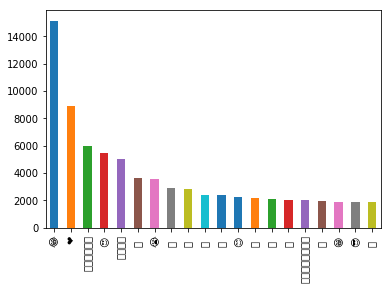

In [12]:
# vorkommen aller emoji
df_emoji_rows.extr_emojis.value_counts().head(20).plot.bar()

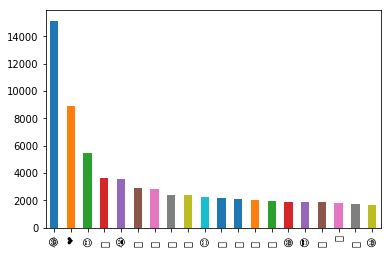

In [84]:
# vorkommen von nur einzelnen emoji
df_emoji_rows['extr_emojis'][df_emoji_rows['extr_emojis'].str.len() == 1].value_counts().head(20).plot.bar()

In [33]:
### unhide the strings in jupyter notebook
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)


#new_df.clean_text[new_df['clean_text']==997055707471003653]
type(df.iloc[15]['in_reply_to_user_id_str'])

numpy.float64

In [ ]:
Zipfsche Gesetz
y-Achse = relative Worthäufigkeit bzw. Emojihäufigkeit
x-Achse = Rang
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.zipf.html

In [23]:
# test/WIP: find a response to an initial tweet
df_initial_tweets = df_emoji_rows[df_emoji_rows['in_reply_to_user_id_str'].isnull()] # tweets without reply_id
df_response_tweets = df_emoji_rows[~df_emoji_rows['in_reply_to_user_id_str'].isnull()] # tweets with reply_id
df_response_tweets['in_reply_to_user_id_str'] = df_response_tweets['in_reply_to_user_id_str'].astype(np.int64)

for id_str in df_initial_tweets['id_str']:
    for re_id in df_response_tweets['in_reply_to_user_id_str'].head(200):
        if id_str == re_id:
            print('found a match')
# id_str type= int
# in_reply_to_user_id_str type = float


c:\users\wilm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
### Conversations zusammenstellen
# finding all tweets that response to an initial tweet
# Conversation = initial_tweet & reply_tweet


df_initial_tweets = df_emoji_rows[df_emoji_rows['in_reply_to_user_id_str'].isnull()] # tweets without reply_id
df_response_tweets = df_emoji_rows[~df_emoji_rows['in_reply_to_user_id_str'].isnull()] # tweets with reply_id

# transform datatype in "in_reply_to_user_id_str" from numpy.float64 to np.int64
df_response_tweets['in_reply_to_user_id_str'] = df_response_tweets['in_reply_to_user_id_str'].astype(np.int64)


dialogues_1vs1 = []
    
for index, row in df_initial_tweets.head().iterrows():
    #print(row['clean_text'])
    response_tweet_list = [x.strip() for x in row['clean_text'].split(',')]
    for response_tweet_id in response_tweet_list:
        response_tweet_id = int(response_tweet_id)
        if len(response_tweet_list) == 1: # conversation besteht lediglich aus zwei aussagen (initaler und antwortender tweet)
        #print('response_tweet_id: ', response_tweet_id, type(response_tweet_id))
            for tweet_id in df_initial_tweets['id_str']:
                #print('tweet_id: ', tweet_id, type(tweet_id))
                if response_tweet_id == tweet_id: 
                    #print('\nConversation\n')
                    #print('initial_tweet')
                    #print(row['tweet_id'], row['text'])
                    #print(row['text'])
                    initial_tweet = row['raw_text']

                    #print('response_tweet')
                    response_tweet = df_response_tweets.loc[df_response_tweets['id_str']== response_tweet_id]['text']
                    #print(response_tweet.values[0])
                    response_tweet = df_response_tweets.loc[df_response_tweets['id_str']== response_tweet_id]['text']
                    dialogues_1vs1.append([initial_tweet, response_tweet.values[0]])
print('done')

c:\users\wilm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


ValueError: invalid literal for int() with base 10: 'My morning just got better !  @BTS_twt #iVoteBTSBBMAs https://t.co/EoJ83MA5Pz'

In [ ]:
### quantitative Analyse von Abhängigkeiten
# bei gegebenen emoji im initial Tweet, welche top 3 emoji im reply Tweet folgen?
# x Achse: relative Frequenz von reply-tweet-emoji (Top 5)
# y Achse: initial-tweet-emoji sortiert nach Häufigkeit (häufigster emoji links) (insgesamt Top 5 emoji)

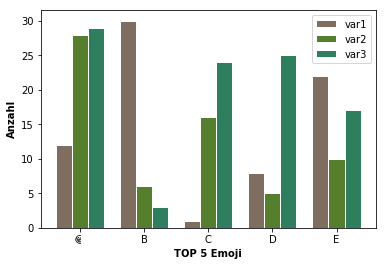

In [21]:
### Spielwiese

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('TOP 5 Emoji', fontweight='bold')
plt.ylabel('Anzahl', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['😂', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()
